# Worksheet 12

Name: Xudong Wang   
UID: U91936499

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1, 3 are example of classification, because the output are categorical based on the input. 2, 4 are not, because the output are continuous or discrete, which are more like regression.

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

We can divide the dataset into train and test two parts, and using the test data to figure out the performance of the model.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting means the model didn't learn so much about the data and are not good with the extracted features, the output might be looks like random guessing. Overfitting means the model just remember all the information of the data, it is not generalization, which means the model will do bad in unseen datasets.

### K Nearest Neighbors

In [22]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}
plt.style.use("default")

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

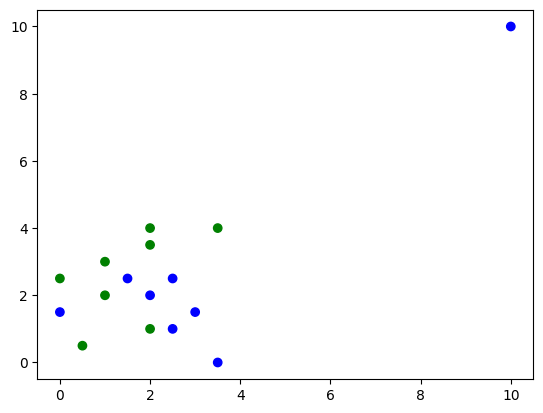

In [23]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

It's up to how to get the dataset, here is a (10,10) point, which seems like far from the other data points, we should remove it

In [24]:
import pandas as pd

df = pd.DataFrame(data)
df = df[(df["Attribute A"] != 10) & (df["Attribute B"] != 10)]
df

,Attribute A,Attribute B,Class
0,3.5,4.0,1
1,0.0,1.5,0
2,1.0,2.0,1
3,2.5,1.0,0
4,2.0,3.5,1
5,1.5,2.5,0
6,2.0,1.0,1
7,3.5,0.0,0
8,1.0,3.0,1
9,3.0,1.5,0


Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

Nope

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

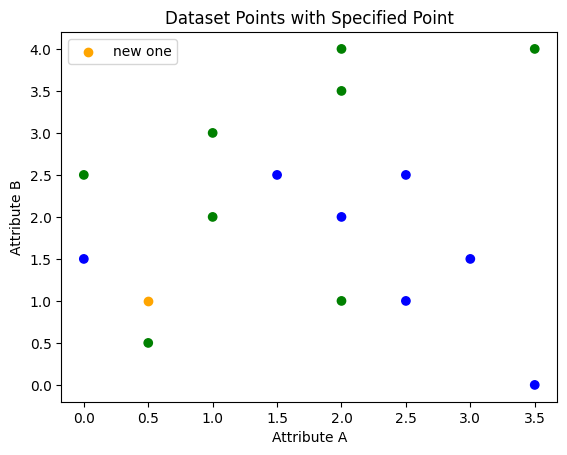

In [25]:
point = {"Attribute A": 0.5, "Attribute B": 1}

plt.scatter(point["Attribute A"], point["Attribute B"], color='orange', label='new one')

colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(df["Attribute A"], df["Attribute B"], color=colors[df["Class"]].tolist())

plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.title('Dataset Points with Specified Point')
plt.legend()
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

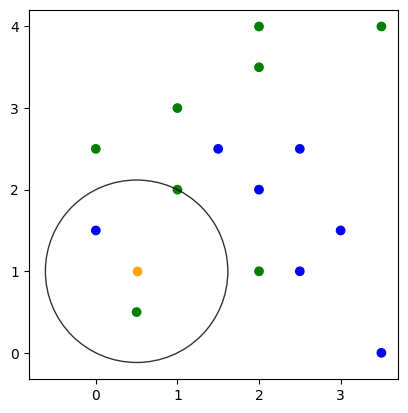

In [68]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def n_closest_to(example, n, data):
    distances = []
    for index, row in data.iterrows():
        distance = euclidean_distance(np.array([example[0], example[1]]), np.array([row['Attribute A'], row['Attribute B']]))
        distances.append((index, distance))
    distances.sort(key=lambda x: x[1])
    closest_indices = [distances[i][0] for i in range(n)]
    return data.iloc[closest_indices], [distances[i][1] for i in range(n)]


location = ( 0.5 , 1 )
closest_points, distances = n_closest_to(location, 3, df)
radius = max(distances)
_, axes = plt.subplots()
plt.scatter(df["Attribute A"], df["Attribute B"], color=colors[df["Class"]].tolist())
plt.scatter(point["Attribute A"],point["Attribute B"], color = "orange")
cir = plt.Circle(location, radius, fill = False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal') # necessary so that the circle is not oval
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [49]:
def majority(points):
    class_counts = closest_points['Class'].value_counts()
    # 如果有一个类别的数量多于其他类别，返回这个类别
    if len(class_counts) > 1 and class_counts.iloc[0] > class_counts.iloc[1]:
        return class_counts.idxmax()
    else:
        default_class = 0
        return default_class
pi = majority(closest_points)
pi

1

g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [58]:
count = 0
for i in range(len(df)):
    actual_class = df["Class"].iloc[i]
    # Here you should define how to represent your test point
    test_point = df[["Attribute A", "Attribute B"]].iloc[i].values

    closest_points, distances = n_closest_to(test_point, 4, df)  # Fetch 4, anticipating one is the test point itself
    if i in closest_points.index:
        closest_points = closest_points.drop(index=i)

    closest_points = closest_points.head(3)  # Ensure only 3 closest remain

    # Now, find the majority class among these closest points
    prediction = majority(closest_points["Class"])
    
    if prediction == actual_class:
        count += 1

overall_accuracy = count / len(df)
print("Overall accuracy = ", overall_accuracy)

Overall accuracy =  0.7333333333333333


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target, test_size=0.2, random_state=1
)


b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

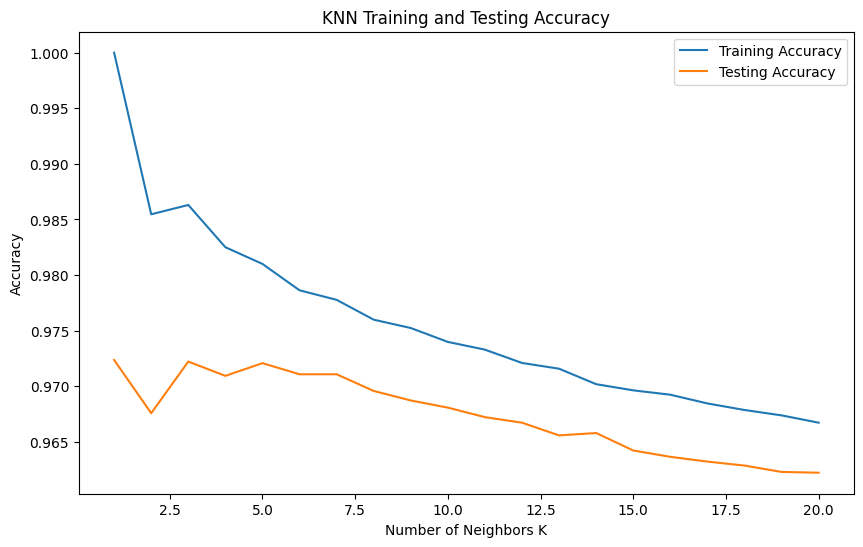

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

training_accuracies = []
testing_accuracies = []

# Range of k values to try
k_values = range(1, 21)

for k in k_values:
    # Create and train the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict on the training set and calculate accuracy
    y_train_pred = knn.predict(X_train)
    training_accuracy = accuracy_score(y_train, y_train_pred)
    training_accuracies.append(training_accuracy)
    
    # Predict on the testing set and calculate accuracy
    y_test_pred = knn.predict(X_test)
    testing_accuracy = accuracy_score(y_test, y_test_pred)
    testing_accuracies.append(testing_accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, training_accuracies, label='Training Accuracy')
plt.plot(k_values, testing_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN Training and Testing Accuracy')
plt.legend()
plt.show()


c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

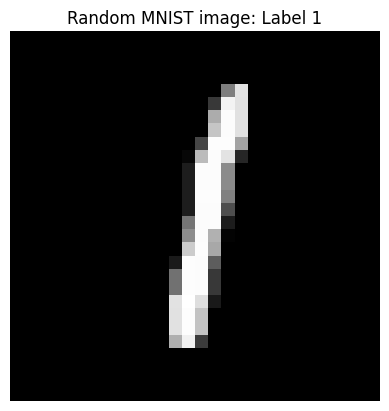

e:\anaconda\envs\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


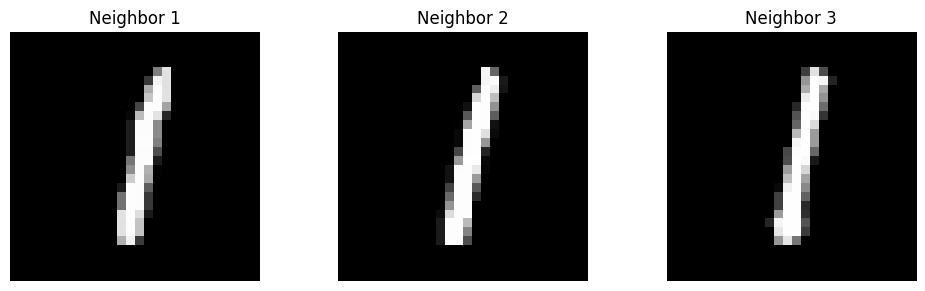

In [71]:
import random

best_k = 3
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)

# Randomly select an image from the training set
random_index = random.randint(0, len(X_train) - 1)
random_image = X_train.iloc[random_index].values
random_image_label = y_train.iloc[random_index]

# Reshape and plot the random image
plt.imshow(random_image.reshape(28, 28), cmap='gray')
plt.title(f'Random MNIST image: Label {random_image_label}')
plt.axis('off')
plt.show()

# Find the K nearest neighbors of this image in the training set
_, neighbors_indices = knn_model.kneighbors([random_image])

# Plot the K nearest neighbors
fig, axes = plt.subplots(1, best_k, figsize=(10, 3))
for i, ax in enumerate(axes.flat):
    neighbor_index = neighbors_indices[0][i]
    neighbor_image = X_train.iloc[neighbor_index].values.reshape(28, 28)
    ax.imshow(neighbor_image, cmap='gray')
    ax.set_title(f'Neighbor {i+1}')
    ax.axis('off')
plt.tight_layout()
plt.show()

d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

In [72]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# we want to keep 95% of variance
pca = PCA(n_components=0.95)

# Create a pipeline
model = make_pipeline(pca, knn_model)

# Fit the model with training data
model.fit(X_train, y_train)

test_accuracy = model.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

train_accuracy = model.score(X_train, y_train)
print(f"Train accuracy: {train_accuracy}")


Test accuracy: 0.9737857142857143
Train accuracy: 0.9874464285714286


 Choosing a number of components that preserve a high percentage of the dataset's variance ensures that most of the information is retained. This is often a balancing act between reducing dimensions to speed up computations and keeping enough features to maintain high accuracy. With fewer dimensions, distance calculations in KNN are quicker, leading to faster model predictions. This is particularly beneficial for large datasets, but we might loose some informations, that's also the reason I preserve a high percentage of the variance.

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic 

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below

1. The features I want to add are:  
Title(miss, mr and etc.): As an indirect indicator of social status, age and different titles may reflect the rising marital status, sex, and gender. So, it may affect the rising survival status.  
Familysize: Sibsp + Parch + 1, as passengers with family members may help each other in an emergency, which can increase the survival.
2. As I try k from 1 to 10, the k = 5 is the best choice    
For more detail, you can see the kaggle notebook

https://www.kaggle.com/code/xudongwang123/notebook3dbed3cf08?scriptVersionId=165961429  
I have done all my work in kaggle notebook

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")

In [2]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['Cabin'] = train_data['Cabin'].fillna('Unknown')
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Cabin'] = test_data['Cabin'].fillna('Unknown')
test_data['Fare'] = test_data['Fare'].fillna(train_data['Fare'].median())
nan_columns_after_correction = train_data.isna().sum()
nan_columns_after_correction = nan_columns_after_correction[nan_columns_after_correction > 0]

nan_columns_after_correction

Series([], dtype: int64)

In [3]:
# Fill missing values for 'Age' and 'Embarked'
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
most_common_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(most_common_embarked)

# Simplify 'Cabin' feature and extract 'Title' from 'Name'
train_data['Cabin'] = train_data['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'Unknown')
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Drop unnecessary columns
train_data.drop(['Name', 'Ticket'], axis=1, inplace=True)

# Add new feature 'FamilySize'
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

# Convert categorical features to numerical features
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked', 'Cabin', 'Title'])

# Select features for the model
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [4]:
test_data['Age'] = test_data['Age'].fillna(train_data['Age'].median())

test_data['Embarked'] = test_data['Embarked'].fillna(most_common_embarked)

test_data['Cabin'] = test_data['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'Unknown')
test_data['Title'] = test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

test_data.drop(['Name', 'Ticket'], axis=1, inplace=True)

test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked', 'Cabin', 'Title'])

missing_cols = set(train_data.columns) - set(test_data.columns) - {'Survived'}
for c in missing_cols:
    test_data[c] = 0

test_data = test_data[X.columns]

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_val)

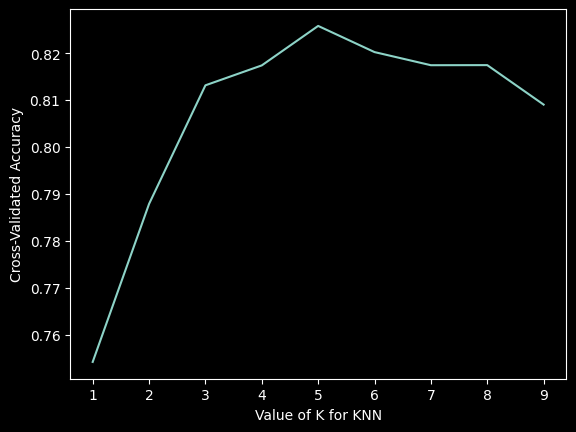

In [6]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Best k
k_range = range(1, 10)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [7]:
from sklearn.metrics import accuracy_score

best_k = 5
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X, y)

#predictions = knn.predict(test_data)

#submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})
#submission.to_csv('submission.csv', index=False)

# Calculate accuracy by comparing to the true outcomes
val_predictions = knn.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)

print(f'Test Set Accuracy: {val_accuracy}')

Test Set Accuracy: 0.776536312849162
